Aluno: Diego Ozorio Antunes
UTFPR - Inteligencia artificial

Baseado no exemplo prático deste bloco com a implementação do autoencoder utilizando o dataset MNIST, implementar utilizando a mesma técnica para processar o dataset fashion_mnist, que se encontra na própria API Keras (from keras.datasets import fashion_mnist) (https://keras.io/api/datasets/fashion_mnist/).

Obs: A entrega até a data limite será atribuída a nota integral com os descontos dos erros. A partir desta data será descontado 10% da nota no dia seguinte somado a 1% por dia de atraso, podendo ser entregue até a data final da Segunda Chamada. Contudo, parte da resolução do exercício será disponibilizada no dia posterior à data limite sem desconto.

# ***APLICAÇÃO DO AUTOENCODER UTILIZANDO O DATASET fashion_mnist COM KERAS E POSTERIOR CLASSIFICAÇÃO DOS DADOS PROCESSADOS***

**-> IMPORTAÇÃO DAS BIBLIOTECAS**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from keras.datasets import mnist
from keras.datasets import fashion_mnist
from keras.layers import Dense, Input, Activation, Dropout
from keras.models import Model
from keras.models import Sequential

**-> CARREGAMENTO E TRATAMENTO DOS DADOS**

In [2]:
# Carregando o conjunto de dados MNIST
#(x_train, y_train), (x_test, y_test) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(x_test.shape)

valMax = x_train.max()

# Normalizando os valores dos pixels para o intervalo [0, 1]
x_train = x_train / valMax
x_test = x_test / valMax

# Transformando as imagens em vetores unidimensionais (784 pixels)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Aplicação de ruído nos dados e armazenando em variáveis acessórias
factor = 0.1
x_train_noisy = x_train + factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

print(x_train.shape)
print(x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


-> VISUALIZAÇÃO DE ALGUMAS IMAGENS PARA TREINAMENTO

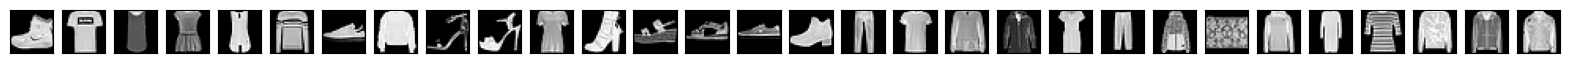

In [3]:
# Visualizando algumas imagens originais
n = 30
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem de entrada com ruído
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**-> CONSTRUÇÃO DO MODELO AUTOENCODER COM DADOS ORIGINAIS**

In [4]:
# Definindo a dimensão da representação codificada
n_latent = 60

# Criando o modelo do autoencoder
model = Sequential()
model.add(Dense(units = 400, input_dim=x_train.shape[1], activation="relu"))
model.add(Dense(units = 200, activation="relu"))
model.add(Dense(units = n_latent, activation="relu"))
model.add(Dense(units = 200, activation="relu"))
model.add(Dense(units = 400, activation="relu"))
model.add(Dense(units = x_train.shape[1], activation="sigmoid"))

# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy')

**-> TREINAMENTO COM DADOS ORIGINAIS E VALIDAÇÃO DO MODELO TREINADO COM DADOS SEM RUÍDOS**

In [5]:
# Treinando o autoencoder
model.fit(x_train, x_train, epochs=30, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Codificando e decodificando as imagens de teste sem ruído
encoded_imgs = model.predict(x_test)

Epoch 1/30
235/235 [==============================] - 25s 85ms/step - loss: 0.3538 - val_loss: 0.3100
Epoch 2/30
235/235 [==============================] - 9s 40ms/step - loss: 0.2977 - val_loss: 0.2971
Epoch 3/30
235/235 [==============================] - 9s 40ms/step - loss: 0.2889 - val_loss: 0.2880
Epoch 4/30
235/235 [==============================] - 10s 41ms/step - loss: 0.2842 - val_loss: 0.2848
Epoch 5/30
235/235 [==============================] - 10s 41ms/step - loss: 0.2811 - val_loss: 0.2816
Epoch 6/30
235/235 [==============================] - 8s 36ms/step - loss: 0.2786 - val_loss: 0.2799
Epoch 7/30
235/235 [==============================] - 10s 41ms/step - loss: 0.2769 - val_loss: 0.2792
Epoch 8/30
235/235 [==============================] - 9s 40ms/step - loss: 0.2754 - val_loss: 0.2773
Epoch 9/30
235/235 [==============================] - 9s 37ms/step - loss: 0.2741 - val_loss: 0.2764
Epoch 10/30
235/235 [==============================] - 9s 38ms/step - loss: 0.2732 - va

**-> GRÁFICO COMPARATIVO DE DADOS ORIGINAL E DADOS GERADOS EM FORMA DE IMAGEM - SEM RUÍDO GERADO**

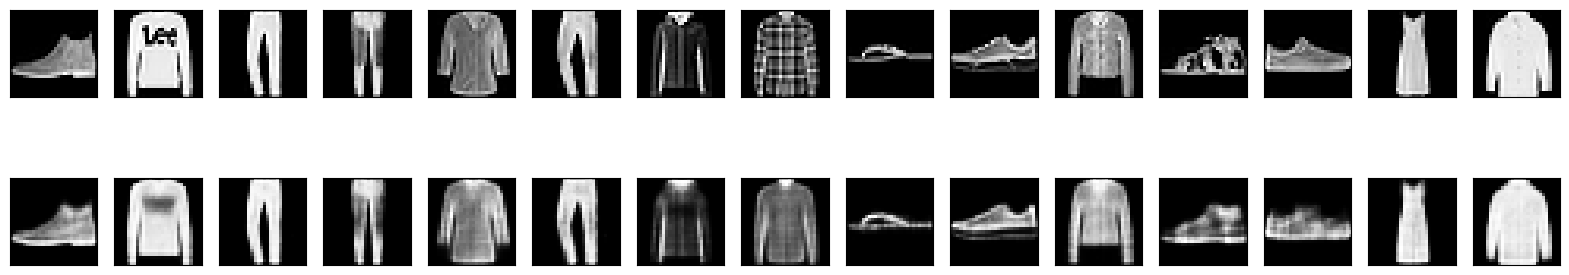

In [6]:
# Visualizando algumas imagens originais sem ruído e reconstruídas
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

-> VALIDAÇÃO COM DADOS COM RUÍDO USANDO O MESMO MODELO TREINADO ORIGINAL

In [7]:
# Codificando e decodificando as imagens de teste com ruído
encoded_imgs = model.predict(x_test_noisy)

313/313 [==============================] - 1s 4ms/step


**-> GRÁFICO COMPARATIVO DE DADOS ORIGINAL E DADOS GERADOS EM FORMA DE IMAGEM - COM RUÍDO GERADO**

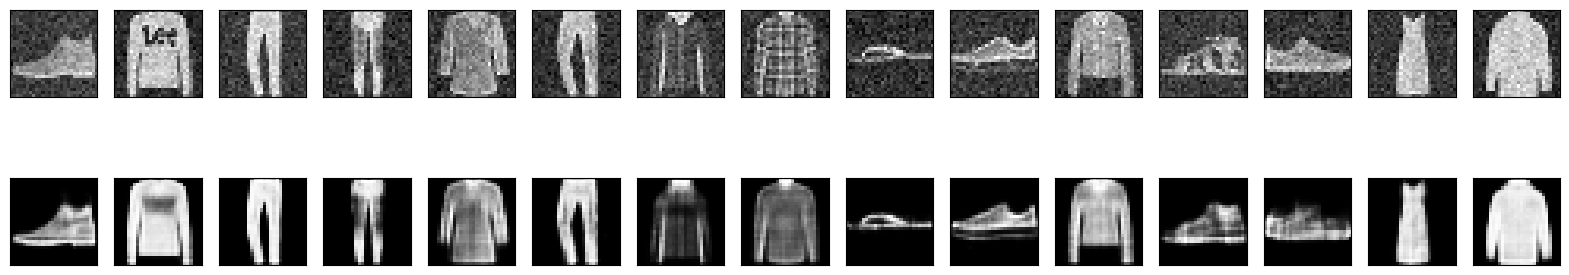

In [8]:
# Visualizando algumas imagens originais com ruído e reconstruídas
n = 15
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagem de entrada com ruído
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Imagem reconstruída com redução do ruído
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

**-> CRIANDO UM MODELO DE CLASSIFICAÇÃO PARA TESTAR AS AMOSTRAS RUIDOSAS, AMOSTRAS ORIGINAIS E AS AMOSTRAS RECUPERADAS DO RUÍDO**

In [9]:
#dropout = 0.45
num_labels = len(np.unique(y_train))

model2 = Sequential()
model2.add(Dense(units=400, input_dim=x_train.shape[1], activation='relu'))
#model2.add(Dropout(dropout)) #Essa camada ajuda a evitar overfitting durante o treinamento, desligando aleatoriamente um certo número de neurônios durante cada passagem de treinamento
model2.add(Dense(units=100, activation='relu'))
#model2.add(Dropout(dropout))
model2.add(Dense(units=num_labels, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
model2.fit(x_train, y_train, epochs=40, batch_size=256)

Epoch 1/40
235/235 [==============================] - 4s 13ms/step - loss: 0.5455 - accuracy: 0.8087
Epoch 2/40
235/235 [==============================] - 4s 17ms/step - loss: 0.3803 - accuracy: 0.8651
Epoch 3/40
235/235 [==============================] - 3s 13ms/step - loss: 0.3385 - accuracy: 0.8763
Epoch 4/40
235/235 [==============================] - 3s 13ms/step - loss: 0.3112 - accuracy: 0.8877
Epoch 5/40
235/235 [==============================] - 3s 13ms/step - loss: 0.2900 - accuracy: 0.8940
Epoch 6/40
235/235 [==============================] - 4s 17ms/step - loss: 0.2771 - accuracy: 0.8970
Epoch 7/40
235/235 [==============================] - 3s 12ms/step - loss: 0.2641 - accuracy: 0.9022
Epoch 8/40
235/235 [==============================] - 3s 13ms/step - loss: 0.2515 - accuracy: 0.9075
Epoch 9/40
235/235 [==============================] - 3s 13ms/step - loss: 0.2389 - accuracy: 0.9114
Epoch 10/40
235/235 [==============================] - 4s 19ms/step - loss: 0.2308 - accura

In [11]:
loss, acc = model2.evaluate(x_test, y_test)
print("\nTeste de Acurácia Classificação sem Ruído: %.1f%%" % (100.0 * acc))
loss, acc = model2.evaluate(x_test_noisy, y_test)
print("\nTeste de Acurácia Classificação com Ruído: %.1f%%" % (100.0 * acc))
loss, acc = model2.evaluate(encoded_imgs, y_test)
print("\nTeste de Acurácia Classificação das Imagens Recuperadas do Ruído: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 2s 4ms/step - loss: 0.4355 - accuracy: 0.8931

Teste de Acurácia Classificação sem Ruído: 89.3%
313/313 [==============================] - 1s 3ms/step - loss: 0.5591 - accuracy: 0.8708

Teste de Acurácia Classificação com Ruído: 87.1%
313/313 [==============================] - 1s 3ms/step - loss: 0.5617 - accuracy: 0.8634

Teste de Acurácia Classificação das Imagens Recuperadas do Ruído: 86.3%


**-> APRESENTANDO AS MÉTRICAS COM O SKLEARN**

313/313 [==============================] - 1s 3ms/step
Avaliação da Classificação
Acurácia: 0.8931
MSE:  1.4402
Matriz de confusão das amostras não apresentadas no treinamento:
 [[842   4  16  28   6   2  99   0   3   0]
 [  2 977   2   9   7   0   3   0   0   0]
 [ 20   1 793  10 121   0  55   0   0   0]
 [  9   9  11 902  51   0  15   0   3   0]
 [  0   0  47  16 883   0  51   0   3   0]
 [  2   0   0   1   0 956   1  17   1  22]
 [112   0  81  37  78   0 689   0   3   0]
 [  1   0   0   0   0   7   0 972   1  19]
 [  7   0   2   5   8   2  17   2 957   0]
 [  0   0   0   0   0   4   2  34   0 960]]

Relatório de classificação das amostras não apresentadas no treinamento:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.79      0.81      1000
           3       0.89      0.90      0.90      1000
           4       0.77      0.88      0.82   

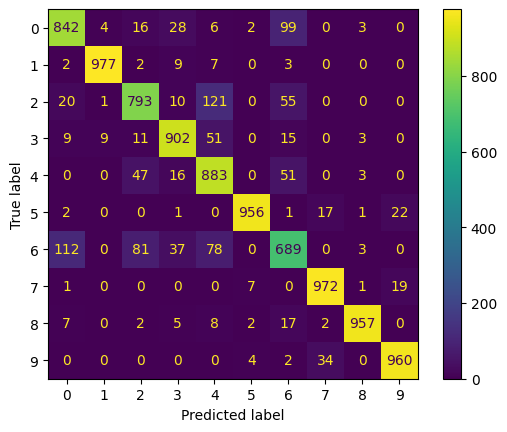

In [12]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay

y_pred = model2.predict(x_test)

#Converter as previsões para classes
y_pred = np.argmax(y_pred, axis=1)

print("Avaliação da Classificação")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test, y_pred)}")
print("")
relatorio = classification_report(y_test, y_pred, target_names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
print("Relatório de classificação das amostras não apresentadas no treinamento:")
print(relatorio)

print(f"Matriz de confusão das amostras não apresentadas no treinamento:\n {confusion_matrix(y_test, y_pred)}")
print("")
conf_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
cm_display.plot()
plt.show()